In [25]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8) #configurando tamanho e fonte dos gráficos
plt.rcParams.update({'font.size': 22})

# Métodos Numéricos

## interpolação polinomial: alguns problemas

### Patric Lacouth

# Problema 1

Dados os pontos da tabela:

| x | y |
| -- | -- |
-1 | 0.03846154
-0.5 | 0.13793103
0 | 1
0.5 | 0.13793103
1 | 0.03846154

Compare os gráficos obtidos com a resposta exata dada pela função

$$f(x) = \frac{1}{1+25x^2}$$

In [26]:
def dd(x,y):
    if len(x) == 1:
        return y[0]
    else:
        return (dd(x[1:],y[1:]) - dd(x[:-1],y[:-1])) / (x[-1] - x[0])

In [27]:
xi = np.array([-1,-0.5,0,0.5,1], dtype=float)
yi = 1 / (1 + 25 * xi ** 2)
xi,yi

(array([-1. , -0.5,  0. ,  0.5,  1. ]),
 array([0.03846154, 0.13793103, 1.        , 0.13793103, 0.03846154]))

In [28]:
x = sympy.Symbol('x')
x

x

In [29]:
Px = yi[0]
for i in range(2,len(xi) + 1):
    termo = dd(xi[0:i],yi[0:i])
    for j in range(i - 1):
        termo *= (x - xi[j])
    Px += termo


# o polinômio interpolador

In [30]:
Px = sympy.simplify(Px)
Px

3.315649867374*x**4 - 4.27718832891247*x**2 + 1.11022302462516e-16*x + 1.0

In [31]:
f = sympy.lambdify(x,Px,'numpy')
f(1)

0.038461538461529554

In [32]:
xa = np.arange(-1,1,0.01)
ya = f(xa)
yr = 1 / (1 + 25 * xa ** 2)

# o resultado

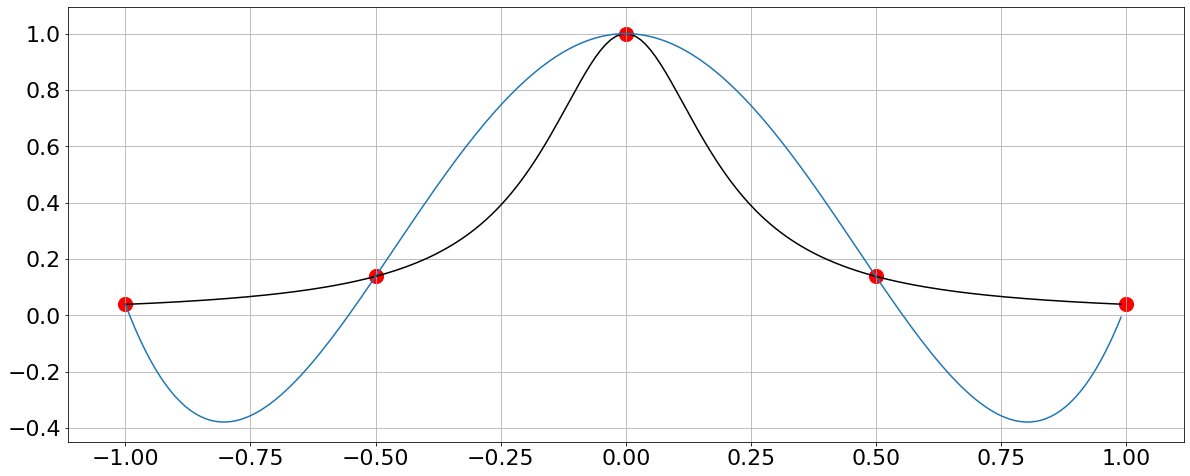

In [33]:
plt.plot(xa,yr,c='black');plt.plot(xa,ya);plt.scatter(xi,yi,c='red',s=200);plt.grid(True)

## Problema 2: Perigos da extrapolação utilizando interpolação

A população em milhões dos Estados Unidos de 1920 a 2000 pode ser tabulada como

Data|População
-------|------
1920|106,46
1930|123,08
1940|132,12
1950|152,27
1960|180,67
1970|205,05
1980|227,23
1990|249,46
2000|281,42

Ajuste um polinômio de sétimo grau aos 8 primeiros pontos (1920 a 1990). Use-o para calcular a população em 2000 por extrapolação e compare sua previsão com o resultado real.

In [35]:
xi = np.array([1920,1930,1940,1950,1960,1970,1980,1990], dtype = float)
yi = np.array([106.46,123.08,132.12,152.27,180.65,205.05,227.23,249.46], dtype = float)
    
Px = yi[0]
for i in range(2,len(xi) + 1):
    termo = dd(xi[0:i],yi[0:i])
    for j in range(i - 1):
        termo *= (x - xi[j])
    Px += termo

In [36]:
p = sympy.lambdify(x,Px,'numpy')
p(1920)

106.45999999999458

# a interpolação

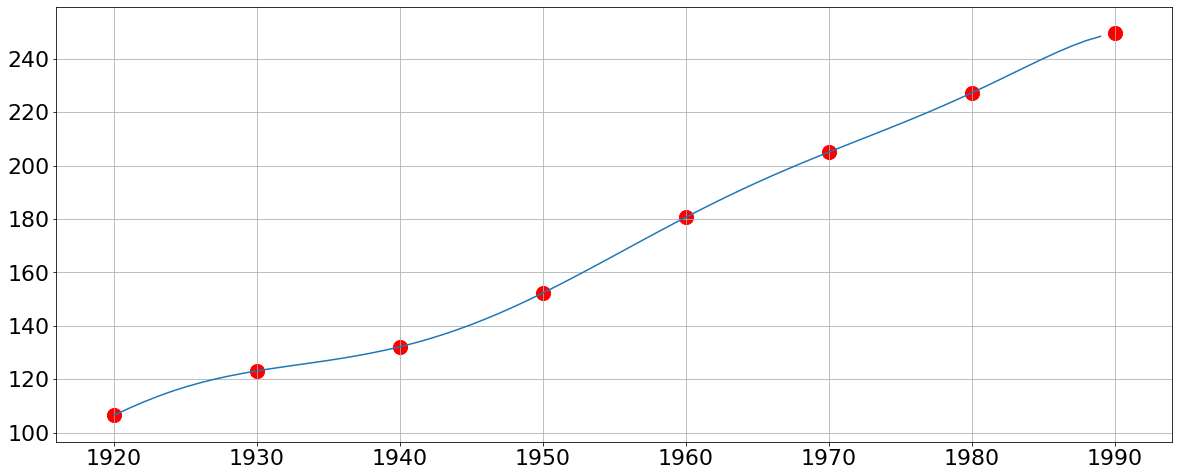

In [37]:
xr = np.arange(1920,1990,1)
yr = p(xr)

plt.plot(xr,yr)
plt.scatter(xi,yi,c='red',s=200)
plt.grid(True)

# a extrapolação
#### testando entre 1920 e 2000

In [38]:
xi = np.array([1920,1930,1940,1950,1960,1970,1980,1990,2000])
yi = np.array([106.46,123.08,132.12,152.27,180.65,205.05,227.23,249.46,281.42])

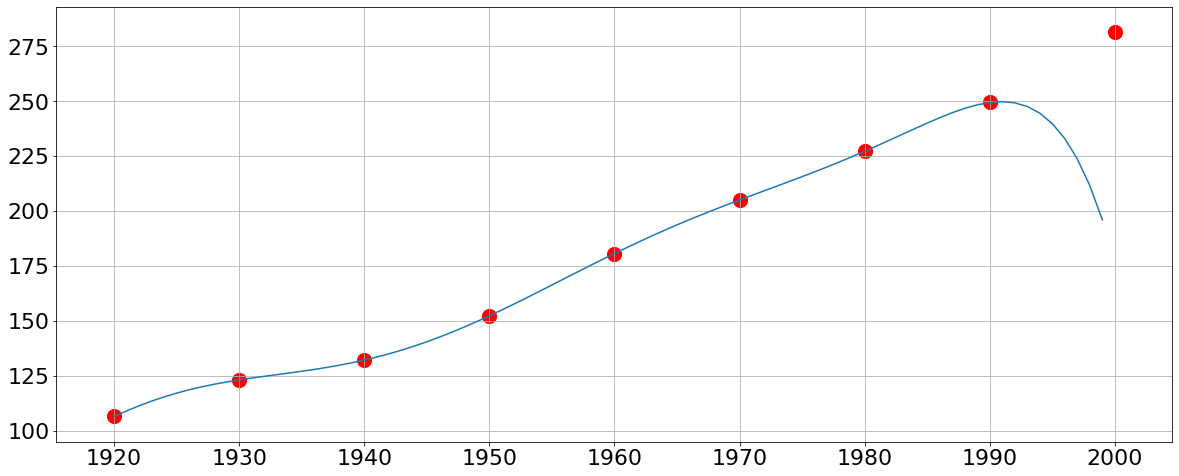

In [39]:
xr = np.arange(1920,2000,1);yr = p(xr);plt.plot(xr,yr);plt.scatter(xi,yi,c='red',s=200);plt.grid(True)

# now, go code!